# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [10]:
# prerequisite package imports

#YOUR CODE
import numpy as np
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
from google.colab import drive

In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [12]:
file_path = "/content/drive/MyDrive/fuel_econ.csv"

In [13]:
#YOUR CODE
fuel_econ = pd.read_csv(file_path)
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

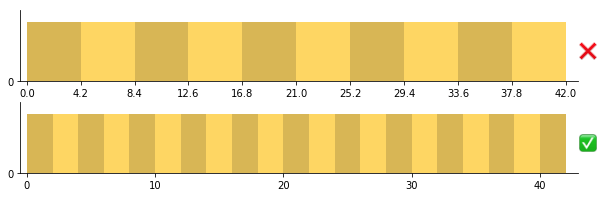

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








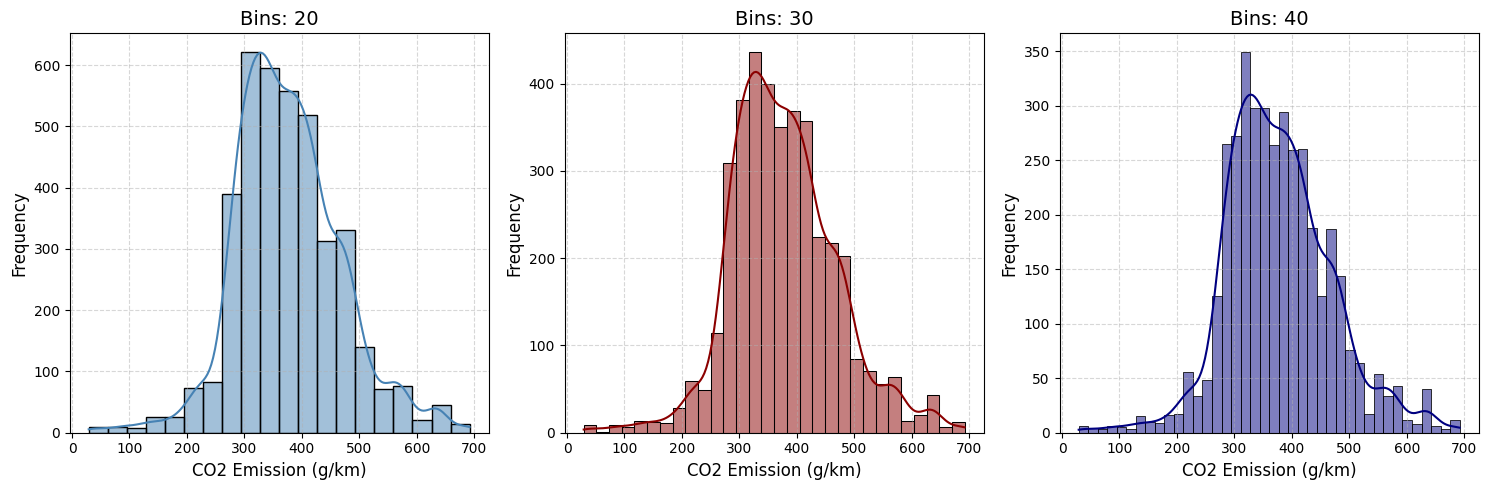

In [14]:
# YOUR CODE HERE
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

bin_sizes = [20, 30, 40]
colors = ['steelblue', 'darkred', 'navy']

for i, bin_size in enumerate(bin_sizes):
    ax = axs[i]
    sb.histplot(data=fuel_econ, x="co2", kde=True, bins=bin_size, color=colors[i], ax=ax)
    ax.set_title(f'Bins: {bin_size}', fontsize=14)
    ax.set_xlabel('CO2 Emission (g/km)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()

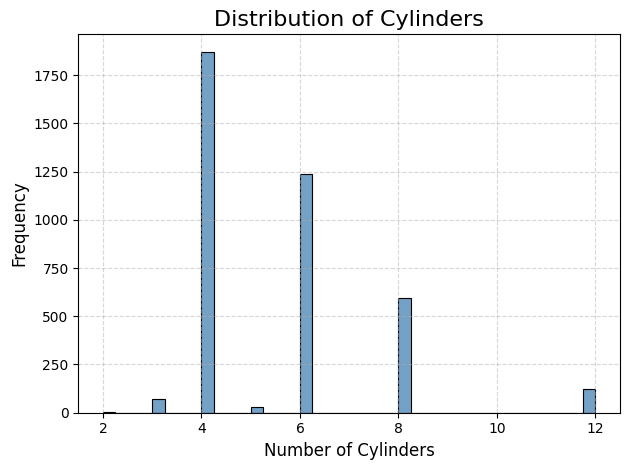

In [15]:
# YOUR CODE HERE
sb.histplot(data=fuel_econ, x="cylinders", kde=False, color='steelblue')
plt.title('Distribution of Cylinders', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

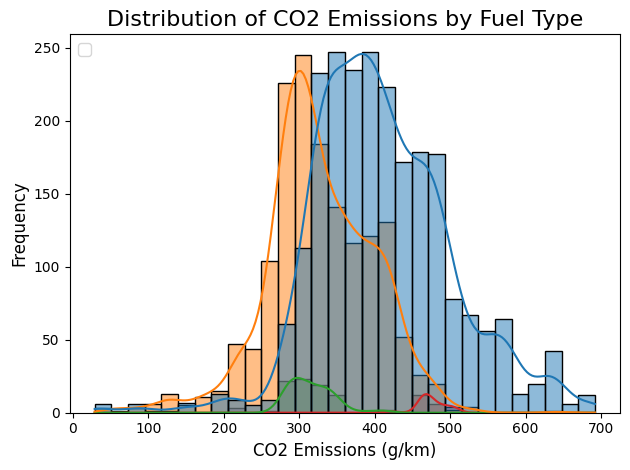

In [16]:
# YOUR CODE HERE
sb.histplot(data=fuel_econ, x="co2", hue="fuelType", kde=True, bins=30)
plt.title('Distribution of CO2 Emissions by Fuel Type', fontsize=16)
plt.xlabel('CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Gasoline (G)', 'Diesel (D)', 'Hybrid (H)', 'Electric (E)', 'LPG (LP)'],
           fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

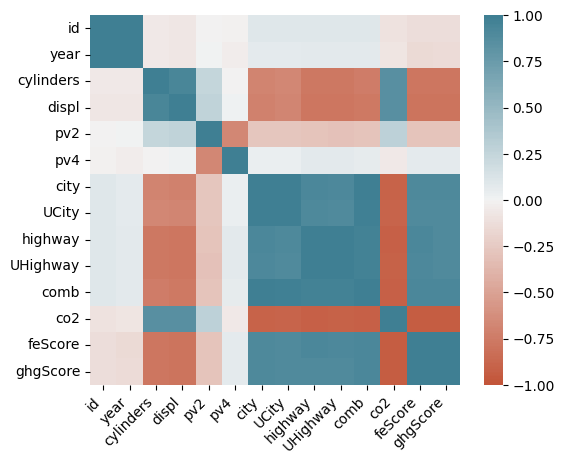

**Data Interpretion:**


The histograms provide information about the distribution of carbon dioxide emissions, fuel efficiency, and vehicle weight in the fuel_econ dataset. The histogram of carbon dioxide emissions shows that the majority of automobiles produce between 200 and 300 grams per kilometer. While there are a few outliers with much larger emissions, they do not represent the overall pattern. Similarly, the fuel efficiency histogram shows that the majority of vehicles in the dataset get between 20 and 30 miles per gallon, with a few outliers achieving even higher fuel economy. The histogram of vehicle weight shows that the bulk of vehicles weigh between 2,000 and 4,000 pounds, with outliers reflecting extremely heavy vehicles.

**What Columns would you delete/Drop if the target is the ghg score? Justify your Answer:**

The columns that I dropped are not directly related to the GHG score, which is the target variable for prediction. They include the unique identifier (`id`), manufacturer and model names (`make`, `model`), model year (`year`), vehicle class (`VClass`), drive type (`drive`), transmission type (`trans`), and fuel type (`fuelType`). These columns may contain some indirect information about fuel efficiency or GHG emissions, but they are not considered to be strong predictors of the GHG score. Dropping these columns reduces the dimensionality of the dataset and prevent overfitting.

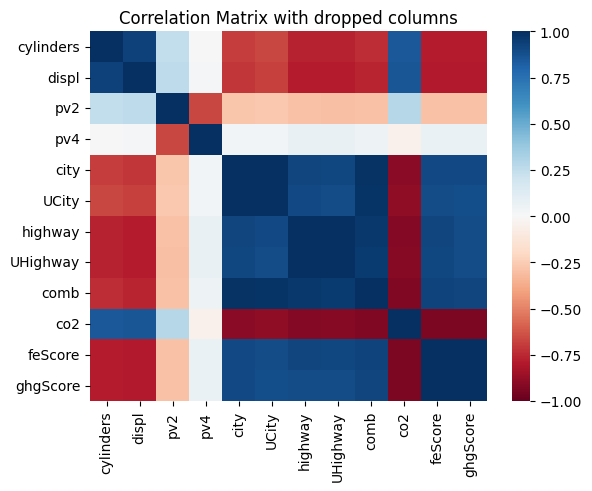

In [18]:
# Drop the columns that are not useful for predicting the ghg score
fuel_econ_reduced = fuel_econ.drop(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType'], axis=1)

# Calculate the correlation matrix
corr = fuel_econ_reduced.corr()

# Create the heat map
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='RdBu', vmin=-1.0, vmax=1.0)
plt.title('Correlation Matrix with dropped columns')
plt.show()